<a href="https://colab.research.google.com/github/woshixiyangyang/AI-Intro-Notebook/blob/main/The_First_PyTorch_Training_From_Tensors_to_Simple_Function_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

five = torch.Tensor([5])
three = torch.Tensor([3])
eight = torch.Tensor([8])

from torch.nn import Linear, MSELoss

f = Linear(2, 1)
input = torch.cat([five, three])
print(input.shape)

input = input.unsqueeze(0)
eight = eight.unsqueeze(0)
print(input.shape)
print(eight.shape)

torch.Size([2])
torch.Size([1, 2])
torch.Size([1, 1])


In [2]:
from torch.optim import Adam
from torch.nn import MSELoss
from tqdm import trange

# 옵티마이저와 손실 함수 정의
optimizer = Adam(f.parameters(), lr=1e-4)
mse = MSELoss()

# 학습 루프
pbar = trange(15000)
outputs = []

for i in pbar:
    output = f(input)                      # 모델 출력
    loss = mse(output, eight)              # 출력과 목표값 비교 (MSE)

    optimizer.zero_grad()                  # 기존 gradient 초기화
    loss.backward()                        # 역전파
    optimizer.step()                       # 파라미터 업데이트

    pbar.set_description(f'output = {output.item()}')

    if i % 100 == 0:                       # 100번마다 결과 저장
        outputs.append(output.item())


output = 7.999967575073242: 100%|██████████| 15000/15000 [00:33<00:00, 450.63it/s]


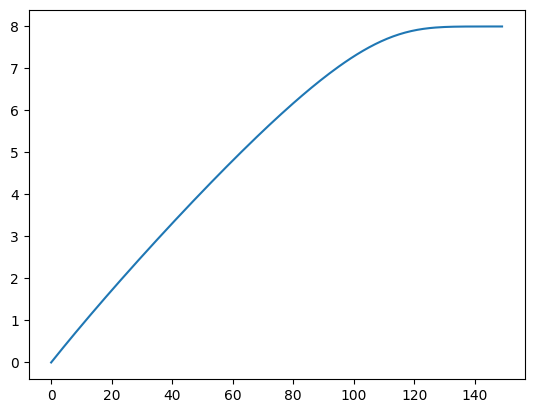

In [3]:
from matplotlib import pyplot as plt

plt.plot(outputs)
plt.show()

In [6]:
f(torch.Tensor([2, 4]))

tensor([6.2757], grad_fn=<ViewBackward0>)